# ソースコード

In [1]:
import numpy
import sympy
from IPython.display import Math
from IPython.display import display
import copy
import matplotlib.pyplot as plt

## 代数計算用基底クラス

In [2]:
class BasicAlgebraicCalculationClass():

  def __init__(self, input_variable_list = []):
    '''
    Initialze object.
    Variables can be defined at __init__. In that case, insert a list of variables as first argument.
    '''
    self.left_hand_side = 'f(x)'
    self.right_hand_side = sympy.symbols("x")
    self.matrix_symbol = None
    self.matrix_element_symbols = None
    self.expanded_right_hand_side = None
    self.integrated_left_hand_side = None
    self.integrated_right_hand_side = None
    self.differentiated_left_hand_side = None
    self.differentiated_right_hand_side = None
    self.variable_list = None
    self.variable_symbols = None
    self.latex_paste_mode = False
    if len(input_variable_list) != 0:
      self.variable_list = input_variable_list
      self.variable_symbols = input_variable_list
      self.set_variable_symbols()

  def copy_class(self):
    '''
    Copy object
    '''
    return copy.copy(self)

  def select_print_mode(self, Bool):
    '''
    Select Print Mode (Default : False)
      False : Print with IPython.Display (Output is in Latex format if a jupyer notebook-based application is used.)
      True :　Print with print function(The output is in Latex formula notation.　Pasteable in overleaf or Cloud latex.)
    '''
    self.latex_paste_mode = Bool

  def set_formula(self, lhs, rhs):
    '''
    Assign left hand side and right hand side
    '''
    self.left_hand_side = lhs
    self.right_hand_side = rhs

  def set_left_hand_side(self, lhs):
    '''
    Assign left hand side
    '''
    self.left_hand_side = lhs

  def set_right_hand_side(self, rhs):
    '''
    Assign right hand side
    '''
    self.right_hand_side = rhs

  def set_variable_symbols(self, input_list=None):
    '''
    Registor the variables created by sympy.symbol to this class.
    It is used for differentiating and integrating.
    '''
    self.variable_symbols = []
    if input_list is not None:
      self.variable_list = input_list
    for i in range( len( self.variable_list ) ):
      self.variable_symbols.append( sympy.symbols( self.variable_list[i] ) )

  def get_formula(self):
    '''
    Return left hand side and right hand side
    '''
    return self.left_hand_side, self.right_hand_side

  def get_left_hand_side(self):
    '''
    Return left hand side
    '''
    return self.left_hand_side

  def get_right_hand_side(self):
    '''
    Return right hand side
    '''
    return self.right_hand_side

  def create_variables(self, input_variable_list):
    '''
    Create variables as algebra using sympy.symbols
      input_variable_list : list of variables.
    '''
    self.created_variable_symbols = []
    for i in range( len( input_variable_list ) ):
      self.created_variable_symbols.append( sympy.symbols( input_variable_list[i] ) )

    self.set_variable_symbols( input_variable_list )
    return self.created_variable_symbols

  def assign_values(self, symbol, values, round_digits=None ):
    '''
    Assign and round variables.
      symbol : list of slgebaric variables
      values : list of numerical variables
      round_digits : number of digits
    '''
    self.variable_values_args = sympy.lambdify( symbol, self.right_hand_side, "numpy" )
    if round_digits is not None:
        for i in range( len( values ) ):
            values[i] = round( values[i], int(round_digits) )
    self.variable_values = self.variable_values_args( *values )

  def get_variable_symbols(self):
    '''
    Return registered symbols
    '''
    return self.variable_symbols

  def get_variable_values(self):
    '''
    Return assigned values
    '''
    return self.variable_values

  def round_right_hand_side(self, round_digits):
    '''
    Improve readability when the formula will be dumped since the default number of digits displayed is very large.
    The rounded function is overridden by the original function.
    Therefore, it is recommended to use this function only at the end of the function output.
    In addition, the problem of +1.0 and -1.0 being displayed after rounding has been eliminated.
    (+1.0 and -1.0 when rounding with zero digits forces the assignment of +1 and -1.)
    '''
    replacements = {}
    for n in self.right_hand_side.atoms( sympy.Number ):
      val = round( n, round_digits )
      if abs( round( val, 0 ) ) == 1:
        replacements[n] = int( round( val, 0 ) )
      else:
        replacements[n] = round( n, round_digits )
    self.right_hand_side = self.right_hand_side.xreplace( replacements )
    return self.right_hand_side

  def create_martix_symbols(self, matrixsymbol, row, col, elementsymbol=None):
    '''
    Create matrix as algebra
      matrixsymbol : variable that represents the entire matrix. (recommend to use capital letter)
      row :　maximum row number
      col : maximum column number
      elementsymbol : symbol of each elements (if elementsymbol is none, lowercase letter is adpoted)
    '''
    self.matrix_symbol = []
    self.matrix_element_symbols = []
    matrix = []
    for i in range( row ):
      rowindex = "_"+str(i+1)
      row = []
      for j in range( col ):
        colindex = "_" + str(j+1)
        elements = None
        if elementsymbol is None:
          elements = matrixsymbol.lower() + rowindex+colindex
        else :
          elements = elementsymbol + rowindex + colindex
        self.matrix_element_symbols.append( sympy.symbols( elements ) )
        row.append( elements )
      matrix.append( row )
    self.matrix_symbol = sympy.Matrix( matrix )
    return self.matrix_symbol, self.matrix_element_symbols

  def print_formula(self):
    '''
    Dump formula.
    Select print mode in self.select_print_mode()
      False : Print with IPython.Display (Output is in Latex format if a jupyer notebook-based application is used.)
      True :　Print with print function(The output is in Latex formula notation.　Pasteable in overleaf or Cloud latex.)
    '''
    if not self.latex_paste_mode:
      display( Math( f'{self.left_hand_side} = {sympy.latex( self.right_hand_side )}' ) )
    elif self.latex_paste_mode:
      print(  self.left_hand_side , "=", sympy.latex( self.right_hand_side ), "\\\\" )

  def print_external_input(self, external_input_lhs=None, external_input_rhs=None):
    '''
    Dump external input
    Select print mode in self.select_print_mode()
      False : Print with IPython.Display (Output is in Latex format if a jupyer notebook-based application is used.)
      True :　Print with print function(The output is in Latex formula notation.　Pasteable in overleaf or Cloud latex.)
    '''
    dum_lhs = 'f'
    if external_input_lhs is not None:
      dum_lhs = external_input_lhs
    if external_input_rhs is not None:
      if not self.latex_paste_mode:
        display( Math( f'{dum_lhs} = {sympy.latex( external_input_rhs )}' ) )
      elif self.latex_paste_mode :
        print( dum_lhs, " = ", sympy.latex( external_input_rhs ), "\\\\" )

  def expand_formula(self, assign_flag=False):
    '''
    Expand formula.
      assign_flag : flag to update original function. (default : no update)
    '''
    self.expanded_right_hand_side = self.right_hand_side.expand()
    if not self.latex_paste_mode:
      display( Math( f'{self.left_hand_side} = {sympy.latex( self.expanded_right_hand_side )}' ) )
    elif self.latex_paste_mode:
      print( self.left_hand_side , "=", sympy.latex( self.expanded_right_hand_side ), "\\\\"  )

    if True:
      self.right_hand_side = self.expanded_right_hand_side

  def get_matrix(self, input):
    '''
    Return matrix
    '''
    return sympy.Matrix( input )

  def indefinite_integral(self, val, update_flag=False):
    '''
    Execute indefinite integral with variable called in 2nd argument.
    '''
    self.integrated_left_hand_side = '\\int ' + self.left_hand_side + 'd' + str(val)
    self.integrated_right_hand_side = sympy.integrate( self.right_hand_side, val )
    if update_flag :
      self.left_hand_side = self.integrated_left_hand_side
      self.right_hand_side = self.integrated_right_hand_side
    return self.integrated_right_hand_side

  def definite_integral(self, val, min, max, update_flag=False):
    '''
    Execute definite integral with variable called in 2nd argument from min(3rd argument) to max(4th argument).
    '''
    self.integrated_left_hand_side = '\\int_{' + str(min) + '}^{' + str(max) + '}' + self.left_hand_side + 'd' + str(val)
    self.integrated_right_hand_side = sympy.integrate( self.right_hand_side, ( val, min, max ) )
    if update_flag:
      self.left_hand_side = self.integrated_left_hand_side
      self.right_hand_side = self.integrated_right_hand_side
    return self.integrated_right_hand_side

  def differentiate(self, val, update_flag=False):
    '''
    Execute differentiate with variable called in 2nd argument.
    '''
    self.differentiated_left_hand_side = '\\frac{d}{d' + str(val) + '}' + self.left_hand_side
    self.differentiated_right_hand_side = sympy.diff( self.right_hand_side , val )
    if update_flag:
      self.left_hand_side = self.differentiated_left_hand_side
      self.right_hand_side = self.differentiated_right_hand_side
    return self.differentiated_right_hand_side


## 誤差伝搬計算用クラス

In [3]:
class ErrorPropagationClass( BasicAlgebraicCalculationClass ):
  def __init__(self):
    super().__init__()
    self.dfdx_symbol = None
    self.dfdx_value = None
    self.error_series = None
    self.value_series = None
    self.dfdx_value_args = None
    self.dfdx_value = None
    self.error_series_variable = None
    self.error_series_variable_pow2 = None
    self.propagated_error = None
    self.propagated_value = None
    self.original_function = None
    self.latex_paste_mode = False

  def copy_class(self):
    '''
    Copy object
    '''
    return copy.copy(self)

  def set_value_series(self, values):
    '''
    '''
    self.value_series = []
    for i in range( len( values ) ):
      self.value_series.append( values[i] )

  def set_error_series(self, evalues):
    '''
    '''
    self.error_series = []
    for i in range( len( evalues ) ):
      self.error_series.append( evalues[i] )

  def print_each_term(self, lhs, rhs, i):
    '''
    '''
    if not self.latex_paste_mode:
      display( Math( f'\\frac{{\\partial {self.left_hand_side} }}{{ \\partial {self.variable_symbols[i]} }} = {sympy.latex( self.dfdx_symbol[i] )}' ) )
    elif self.latex_paste_mode:
      print(( '\\frac{{\\partial} f}{{\\partial} x_%d}=\\frac{{\\partial}%s}{{\\partial}%s}=%s \\\\' % (i, sympy.latex(self.left_hand_side), sympy.latex( lhs ), sympy.latex( rhs ) )))

  def partial_derivative(self, dump_flag=False):
    '''
    '''
    self.dfdx_symbol = []
    if self.original_function is None:
      self.original_function = self.right_hand_side
    if dump_flag:
      if not self.latex_paste_mode:
        display( Math( r'{\delta}f=\sqrt{\sum_{i=0}^{n} \left( \frac{{\partial} f}{{\partial} x_i} {\delta}x_i \right)^2}') )
        for i in range( len(self.variable_symbols) ):
          display( Math( f'x_{i} = {self.variable_symbols[i]}' ) )
      elif self.latex_paste_mode:
        print( f'x_{i} = {self.variable_symbols[i]}' )
    for i in range( len( self.variable_symbols ) ):
      self.dfdx_symbol.append( sympy.diff( self.right_hand_side, self.variable_symbols[i] ) )
      if dump_flag:
        self.print_each_term( self.variable_symbols[i], self.dfdx_symbol[i], i )

  def calculate_erorr(self, dump_flag=False, round_digits=None):
    '''
    '''
    calc_variable_symbols = self.variable_symbols
    calc_dfdx_symbol = self.dfdx_symbol
    calc_value_series = self.value_series
    calc_error_series = self.error_series
    calc_original_function = self.original_function

    self.assign_values( calc_variable_symbols, calc_value_series )
    self.set_right_hand_side( self.get_variable_values() )
    self.propagated_value = self.get_right_hand_side()
    self.set_right_hand_side( calc_original_function )

    self.dfdx_value_args = []
    self.dfdx_value = []
    self.error_series_variable = []
    self.error_series_variable_pow2 = []
    for i in range( len( calc_variable_symbols ) ):
      self.dfdx_value_args.append( sympy.lambdify( calc_variable_symbols, calc_dfdx_symbol[i], "numpy" ) )
      self.dfdx_value.append( self.dfdx_value_args[i]( *calc_value_series ) )
      self.error_series_variable.append( self.dfdx_value[i] * calc_error_series[i] )
      self.error_series_variable_pow2.append( self.error_series_variable[i]**2 )

    self.propagated_error = numpy.sqrt( sum( self.error_series_variable_pow2 ) )

    val_print = self.propagated_value
    err_print = self.propagated_error
    if round_digits is not None :
      val_print = round( self.propagated_value, round_digits )
      err_print = round( self.propagated_error, round_digits )

    if dump_flag:
      if not self.latex_paste_mode:
        display( Math( f'{self.left_hand_side} \\pm \\delta {self.left_hand_side} = {val_print} \\pm {err_print}' ) )
      elif self.latex_paste_mode:
        print( f'{val_print} \\pm {err_print} \\\\' )

    return self.propagated_error, self.propagated_value

# サンプルコード

## 代数計算のやり方

In [4]:
alg_calc = BasicAlgebraicCalculationClass()

# Jupyter Notebook ベースのアプリで綺麗に表示するモード
print("# Jupyter Notebook ベースのアプリで綺麗に表示するモード")
alg_calc.print_formula()

# Latexに貼り付けられる形で表示するモード
print("# Latexに貼り付けられる形で表示するモード")
alg_calc.select_print_mode(True)
alg_calc.print_formula()

# Jupyter Notebook ベースのアプリで綺麗に表示するモード


<IPython.core.display.Math object>

# Latexに貼り付けられる形で表示するモード
f(x) = x \\


### 関数計算

In [5]:
alg_calc = BasicAlgebraicCalculationClass()

# 関数を宣言する。
print("# 関数を宣言する。")
var = alg_calc.create_variables( ["a", "x", "b", "y", "c","\\alpha", "\\beta"] )
fun = var[0] * var[1] + var[2] * var[3]**var[5] + var[4]**var[6]
alg_calc.set_left_hand_side( 'f(x,y)' )
fxy = alg_calc.left_hand_side
alg_calc.set_right_hand_side( fun )
alg_calc.print_formula()

# 不定積分を行う。
print("# 不定積分を行う。")
alg_calc.set_formula( fxy, fun )
ind_intg = alg_calc.indefinite_integral( var[3], True )
alg_calc.print_formula()

# 定積分を行う。
print("# 定積分を行う。")
int_range = [0, 2]
alg_calc.set_formula( fxy, fun )
def_intg = alg_calc.definite_integral( var[1] , *int_range, True )
alg_calc.print_formula()

# 微分を行う。
print("# 微分を行う。")
alg_calc.set_formula( fxy, fun )
dif_func = alg_calc.differentiate( var[4], True )
alg_calc.print_formula()

# 関数を宣言する。


<IPython.core.display.Math object>

# 不定積分を行う。


<IPython.core.display.Math object>

# 定積分を行う。


<IPython.core.display.Math object>

# 微分を行う。


<IPython.core.display.Math object>

### 行列計算

In [6]:
#ヒルベルト行列をnumpyで計算する関数
def hilbert_matrix( n ):
  H = numpy.zeros( ( n, n ) )
  for i in range( n ):
    for j in range( n ):
      H[ i, j ] = 1 / ( i + j + 1 )
  return H

alg_calc = BasicAlgebraicCalculationClass()

#　任意の正方行列を宣言する。
print("#　任意の正方行列を宣言する。")
n = 10
A, a = alg_calc.create_martix_symbols( "A", n, n )
alg_calc.set_left_hand_side( 'A' )
alg_calc.set_right_hand_side( A )
alg_calc.print_formula()

# ヒルベルト行列の値を各要素に代入
print("# ヒルベルト行列の値を各要素に代入")
h_np = hilbert_matrix( n ).flatten()
alg_calc.assign_values( a, h_np )
h_sy = ( alg_calc.get_matrix( alg_calc.get_variable_values() ) )
alg_calc.set_left_hand_side( 'H' )
alg_calc.set_right_hand_side( sympy.nsimplify( h_sy, rational=True ) )
alg_calc.print_formula()

# 対角化を行った後に元のヒルベルト行列との差をとる
print("# 対角化を行った後に元のヒルベルト行列との差をとる")
alg_calc.set_right_hand_side( h_sy )
p, d = alg_calc.right_hand_side.diagonalize()
alg_calc.set_right_hand_side( h_sy -  p * d * p**-1 )
alg_calc.round_right_hand_side( 10 )
alg_calc.set_left_hand_side( 'H-PDP^{-1}' )
alg_calc.print_formula()

#　任意の正方行列を宣言する。


<IPython.core.display.Math object>

# ヒルベルト行列の値を各要素に代入


<IPython.core.display.Math object>

# 対角化を行った後に元のヒルベルト行列との差をとる


<IPython.core.display.Math object>

## 誤差伝搬計算のやり方

### 最も簡単な例

In [7]:
# まず誤差伝搬をしたい関数と変数を定義する
print("# まず誤差伝搬をしたい関数と変数を定義する")
err_pro = ErrorPropagationClass()
var = err_pro.create_variables( ["\\alpha","\\beta"] )
fun = sympy.sqrt( var[0] / var[1] )
err_pro.set_left_hand_side( 'f(\\alpha, \\beta)' )
err_pro.set_right_hand_side( fun )
err_pro.set_variable_symbols()
err_pro.print_formula()

# 誤差伝搬の各項を計算する（代数計算）
print("# 誤差伝搬の各項を計算する（代数計算）")
err_pro.partial_derivative( True )

# 誤差伝搬の代数計算の結果を使って実際に誤差を計算する
print("# 誤差伝搬の代数計算の結果を使って実際に誤差を計算する")
val = [17120., 18571.]
err = [numpy.sqrt(x) for x in val]
err_pro.set_value_series( val )
err_pro.set_error_series( err )
result = err_pro.calculate_erorr( True, 6 )

# まず誤差伝搬をしたい関数と変数を定義する


<IPython.core.display.Math object>

# 誤差伝搬の各項を計算する（代数計算）


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# 誤差伝搬の代数計算の結果を使って実際に誤差を計算する


<IPython.core.display.Math object>

### Woods–Saxon ポテンシャル

In [8]:
# Woods–Saxon ポテンシャルを宣言する
err_pro = ErrorPropagationClass()
var = err_pro.create_variables( ["r","R_i","a_i"] )
fun = 1 / ( 1+ sympy.exp( ( var[0] - var[1] ) / var[2] ) )
err_pro.set_left_hand_side( 'f(r, R_i, a_i)' )
err_pro.set_right_hand_side( fun )
err_pro.set_variable_symbols()

# 微分を計算する
dif_err_pro = err_pro.copy_class()
dif_err_pro.differentiate( 'r' , True )

# Woods–Saxonの誤差伝搬を計算する(代数計算)
print("# Woods–Saxonの誤差伝搬を計算する(代数計算)")
err_pro.print_formula()
err_pro.partial_derivative( True )

# Woods–Saxonの微分の誤差伝搬を計算する(代数計算)
print("# Woods–Saxonの微分の誤差伝搬を計算する(代数計算)")
dif_err_pro.print_formula()
dif_err_pro.partial_derivative( True )

# Woods–Saxonの誤差伝搬を計算する(代数計算)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Woods–Saxonの微分の誤差伝搬を計算する(代数計算)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

最後に代数計算クラスを使って関数とその微分を計算し、誤差とともに描画する。

今回は鉛の場合を計算してみる。

In [9]:
ws_r0 = 1.15 # fm
ws_M = 208.
ws_R = ws_r0 * ws_M**(1./3.)
ws_a = 0.54

fac_calc = ErrorPropagationClass()
var = fac_calc.create_variables( ["r"] )
fun = 1 / ( 1+ sympy.exp( ( var[0] - ws_R ) / ws_a ) )
fac_calc.set_formula( 'f', fun )
factor = fac_calc.definite_integral('r', 0, 30, True)

ws_x  = []
ws_y  = []
ws_ye = []
dws_y  = []
dws_ye = []

for i in range(100):

  r_val = 15. * i / 100.
  ws_x.append( r_val )

  val = [r_val, ws_R, ws_a ]
  err = [0, 0.05*ws_M**(1./3.), 0.05]

  err_pro.set_value_series( val )
  err_pro.set_error_series( err )
  result = err_pro.calculate_erorr()
  ws_ye.append( result[0] / float( factor ) )
  ws_y.append( result[1] / float( factor ) )

  dif_err_pro.set_value_series( val )
  dif_err_pro.set_error_series( err )
  dif_result = dif_err_pro.calculate_erorr()
  dws_ye.append( dif_result[0] / float( factor ) )
  dws_y.append( dif_result[1] / float( factor ) )

最後に描画する。

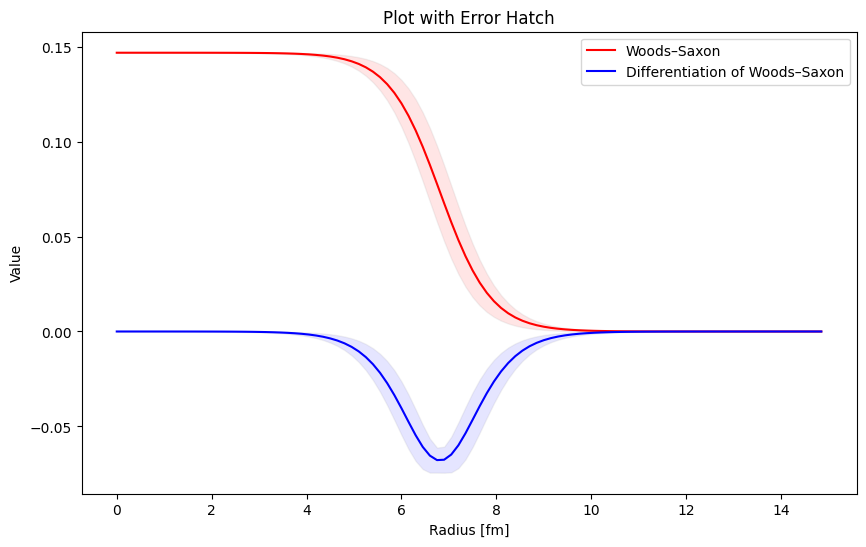

In [10]:
x = numpy.array(ws_x)
y1 = numpy.array(ws_y)
y1e = numpy.array(ws_ye)
y2 = numpy.array(dws_y)
y2e = numpy.array(dws_ye)

plt.figure(figsize=(10, 6))

plt.fill_between( x, y1 - y1e, y1 + y1e, color='red', edgecolor='gray', alpha=0.1 )
plt.fill_between( x, y2 - y2e, y2 + y2e, color='blue', edgecolor='gray', alpha=0.1 )
plt.plot(x, y1, color='red', label='Woods–Saxon')
plt.plot(x, y2, color='blue', label='Differentiation of Woods–Saxon')

plt.xlabel('Radius [fm]')
plt.ylabel('Value')
plt.title('Plot with Error Hatch')
plt.legend()
plt.show()